# Problem Statement:

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("50_Startups.csv")

# Data Exploration:

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [8]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []


In [9]:
# There is no duplicate values present in dataset.

### Identifying Missing Values

In [10]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
# There is no missing values in dataset

### Identifying Outliers

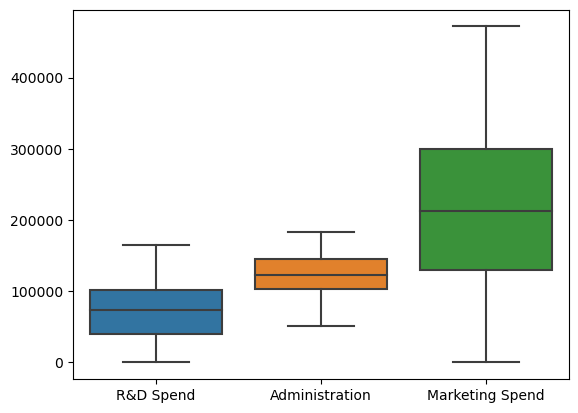

In [12]:
sns.boxplot(data=df.drop('Profit',axis=1));

In [13]:
# With above boxplot we can see there is no outlier present in dataset.

# Data Visualization

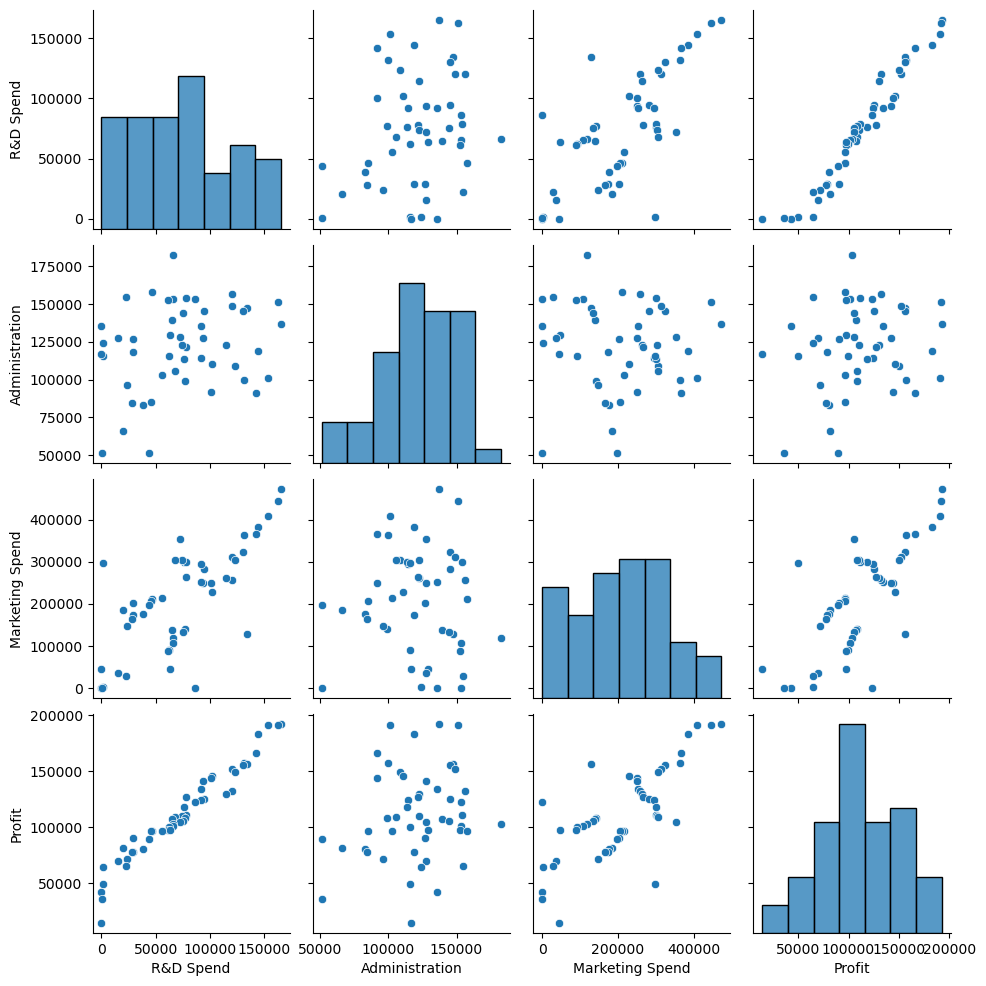

In [14]:
sns.pairplot(df)
plt.show()

C:\Users\vijay\AppData\Local\Temp\ipykernel_21344\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

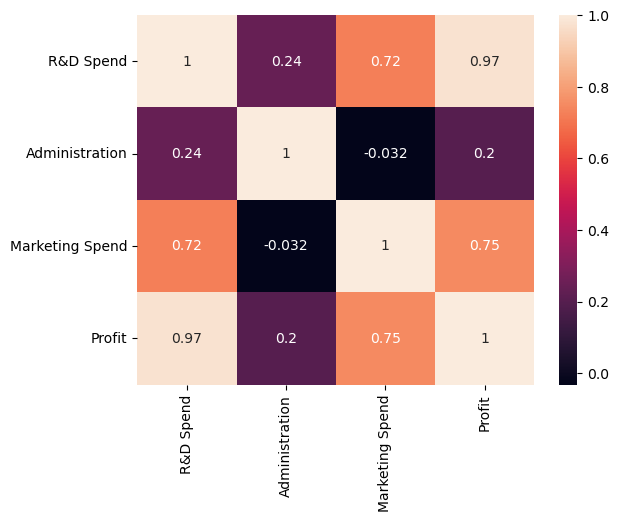

In [15]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Profit', ylabel='Marketing Spend'>

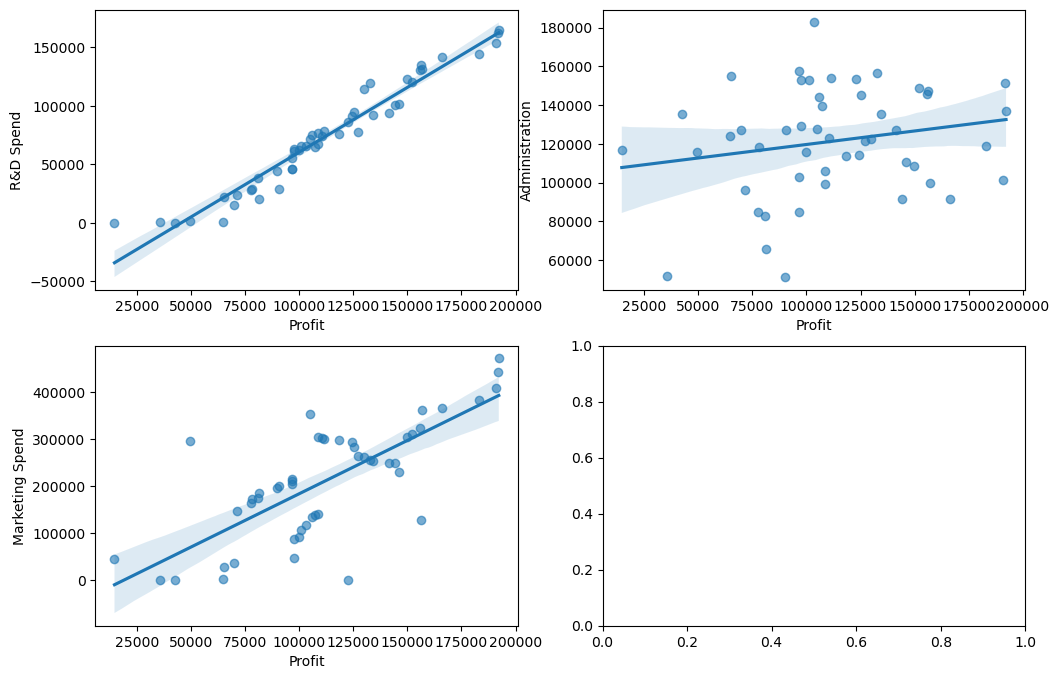

In [16]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Profit', y = 'R&D Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[1,0])

# Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop("Profit", axis=1)
y = df["Profit"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling and Encoding

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
categorical_cols = ["State"]
numeric_cols = ["R&D Spend", "Administration", "Marketing Spend"]

In [22]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

### Creating Pipeline

In [23]:
numeric_transformer = Pipeline(steps=[('scaler', scaler)])
categorical_transformer = Pipeline(steps=[('onehot', onehot)])

In [24]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),
                                               ('cat', categorical_transformer, categorical_cols)])

# Model Selection

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', model)])

In [28]:
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

# Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6961.47781327556
Mean Squared Error (MSE): 82010363.04501358
Root Mean Squared Error (RMSE): 9055.957323497807
R-squared (R2): 0.8987266414319838


# Ridge Model

In [31]:
from sklearn.linear_model import RidgeCV

In [32]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [33]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('ridge_cv_model', ridge_cv_model)])

In [34]:
model_pipeline.fit(X_train, y_train)

ridge_pred = model_pipeline.predict(X_test)

In [35]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
rmse = mean_squared_error(y_test, ridge_pred, squared=False)
r2 = r2_score(y_test, ridge_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6981.724257903268
Mean Squared Error (MSE): 82157288.86525187
Root Mean Squared Error (RMSE): 9064.065802124996
R-squared (R2): 0.8985452049558676


In [36]:
ridge_cv_model.coef_

array([37869.30251155, -1806.64110038,  3559.84988359,  -308.68359038,
         595.9757343 ,  -287.29214392])

# LASSO Model

In [37]:
from sklearn.linear_model import LassoCV

In [38]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [39]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('lasso_cv_model', lasso_cv_model)])

In [40]:
model_pipeline.fit(X_train, y_train)

lasso_pred = model_pipeline.predict(X_test)

In [41]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = mean_squared_error(y_test, lasso_pred, squared=False)
r2 = r2_score(y_test, lasso_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6530.419014731971
Mean Squared Error (MSE): 64869042.305967316
Root Mean Squared Error (RMSE): 8054.132002020287
R-squared (R2): 0.9198941994951273


In [42]:
lasso_cv_model.coef_

array([34740.51016879,    -0.        ,  2136.89596361,    -0.        ,
           0.        ,     0.        ])

# Elastic Net

In [43]:
from sklearn.linear_model import ElasticNetCV

In [44]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [45]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('elastic_model', elastic_model)])

In [46]:
model_pipeline.fit(X_train, y_train)

elastic_pred = model_pipeline.predict(X_test)

In [47]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, elastic_pred)
mse = mean_squared_error(y_test, elastic_pred)
rmse = mean_squared_error(y_test, elastic_pred, squared=False)
r2 = r2_score(y_test, elastic_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6560.489311444282
Mean Squared Error (MSE): 67518259.71835706
Root Mean Squared Error (RMSE): 8216.949538506187
R-squared (R2): 0.9166227209286647


In [48]:
elastic_model.l1_ratio_

1.0

In [49]:
elastic_model.alpha_

1000.0313421167242

In [50]:
# Based on these metrics, Lasso Regression appears to be the best-performing model among the ones listed,
# as it has the lowest MAE, MSE, and RMSE, as well as the highest R-squared value.

# Model Deployment

In [51]:
# from joblib import dump,load

In [52]:
# dump(lasso_cv_model, 'final_lasso_cv_model.joblib')